In [1]:
# Run some setup code for this notebook.
import random
import numpy as np
import os
import utils as ut
import wave
import SoundUtils as SU
import pylab
import Spectograms as spectograms
import forwardPath as forward
import matplotlib 
import matplotlib.image as pltimg
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import scipy.misc
import math
from PIL import Image
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [76]:
path_to_flac_test_folder_track = "/Volumes/Storage/TIMIT/timit/train/dr1/fcjf0/SA1.WAV"
temp_folder = "/Volumes/Storage/Temp"
temp_image_to_process = "/Volumes/Storage/processing.jpg"
array_inversion_file = "/Users/Sergey/Thesis/SpectrogramInversion1.02b/invertMe.mat"
array_inversion_shown_file = "/Users/Sergey/Thesis/SpectrogramInversion1.02b/invertMeShown.mat"


temp = "temp.jpg"

In [77]:
wav_file = SU.PCM2Wav(path_to_flac_test_folder_track, temp_folder)

In [78]:
frames, frame_rate = spectograms.get_wav_info(wav_file)

In [79]:
wav_file

'/Volumes/Storage/Temp/SA1.wav'

In [112]:
windowSize = 256
frameStep = 64
waveform = frames
spect = spectograms.CreateSpectogram(waveform,windowSize,frameStep)
magSpec, freqs, times = spectograms.SpectrogramForDisplay(spect, frame_rate, frameStep)

In [113]:
scipy.io.savemat(array_inversion_file, mdict={'spect':spect})

In [114]:
A = np.real(magSpec)
normalized, minEl, maxEl = spectograms.normalize(A)
normedRGB = spectograms.toRGB(normalized)
#img = Image.fromarray(normedRGB)
#img.save(temp)
img = spectograms.SaveRGB(normedRGB, temp)

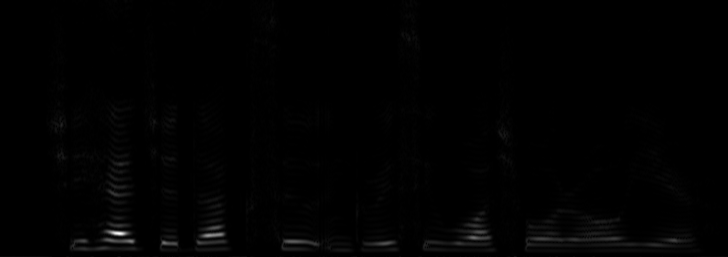

In [115]:
img

In [14]:
#A = pltimg.imread(temp)
#grayArr = spectograms.fromRgb(A)
#original = np.flipud(spectograms.originalFromNormalized(grayArr, minEl, maxEl))
#backwardSpec = spectograms.backwardDisplaySpectogram(spect, original, windowSize)

In [ ]:
#scipy.io.savemat(array_inversion_shown_file, mdict={'spect2':backwardSpec})

In [116]:
im = Image.open(temp, 'r')
height, width = im.size
pixel_values = list(im.getdata())
pixel_values = np.array(pixel_values).reshape((width, height, 3))

In [117]:
grayArr = spectograms.fromRgb(pixel_values)
original = np.flipud(spectograms.originalFromNormalized(grayArr, minEl, maxEl))
backwardSpec = spectograms.backwardDisplaySpectogram(spect, original, windowSize)

In [118]:
scipy.io.savemat(array_inversion_shown_file, mdict={'spect2':backwardSpec})

In [143]:
chunkLength = 11
totalFeatures = normedRGB.shape[1]
freqFFT = normedRGB.shape[0]
#The stepLength is 1 therefore the number of chunks is calculated as follows
numChunks = totalFeatures-chunkLength + 1

for i in range(numChunks):
    chunk = normedRGB[:,i:i+chunkLength,:]
    chunk = scipy.misc.imresize(chunk, (224, 224))
    pa = temp_folder + "/" + str(i) + ".png"
    spectograms.SaveRGB(chunk, pa)

In [191]:
#Construct from chunks
resImg = None
for i in range(numChunks):
    pa = temp_folder + "/" + str(i) + ".png"
    arr = spectograms.ReadRGB(pa)
    arr = scipy.misc.imresize(arr, (freqFFT, chunkLength))
    vect = arr[:,5,:]
    vect = vect[:, np.newaxis, :]
    if resImg is None:
        resImg = vect
    else: 
        resImg = np.hstack((resImg, vect))

In [192]:
##adding silence in the beginning and ending
z = np.zeros((freqFFT, 5, 3))
z = np.uint8(z)
resImg = np.hstack((z, resImg))
resImg = np.hstack((resImg, z))
resImg = np.uint8(resImg)

In [193]:
img = Image.fromarray(resImg)

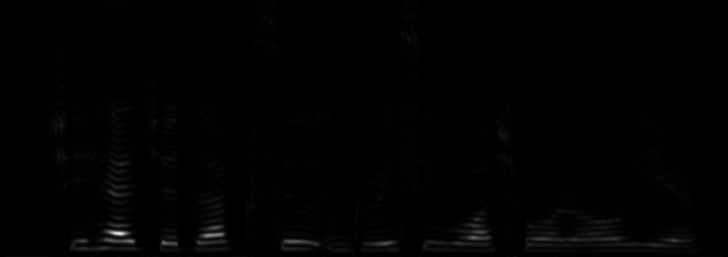

In [194]:
img

In [196]:
grayArr = spectograms.fromRgb(resImg)
original = np.flipud(spectograms.originalFromNormalized(grayArr, minEl, maxEl))
backwardSpec = spectograms.backwardDisplaySpectogram(spect, original, windowSize)

In [199]:
scipy.io.savemat(array_inversion_shown_file, mdict={'spect2':backwardSpec})